# GRIP - THE SPARKS FOUNDATION
### Data Science and Businesss Analytics Task 4 - Exploratory Data Analysis on Global Terrorism
#### Author : Mudita Sharma

### Importing libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") #removing warnings

### Loading dataset

In [89]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Data description and information

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [91]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
df.shape

(181691, 135)

### Data preparation and cleaning

In [93]:
# null values in columns
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [94]:
#column names
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [95]:
df.country_txt.value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

In [96]:
for col in df.columns:
    print(col)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [97]:
# Selecting the columns we need
categories = ['iyear','imonth','country','country_txt','attacktype1_txt','targtype1','targtype1_txt',
'targsubtype1','targsubtype1_txt','gname','weaptype1','region_txt']
df[categories]

,iyear,imonth,country,country_txt,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,gname,weaptype1,region_txt
0,1970,7,58,Dominican Republic,Assassination,14,Private Citizens & Property,68.0,Named Civilian,MANO-D,13,Central America & Caribbean
1,1970,0,130,Mexico,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,13,North America
2,1970,1,160,Philippines,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Unknown,13,Southeast Asia
3,1970,1,78,Greece,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,6,Western Europe
4,1970,1,101,Japan,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,8,East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,182,Somalia,Armed Assault,4,Military,36.0,Military Checkpoint,Al-Shabaab,5,Sub-Saharan Africa
181687,2017,12,200,Syria,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,6,Middle East & North Africa
181688,2017,12,160,Philippines,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),8,Southeast Asia
181689,2017,12,92,India,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Unknown,6,South Asia


In [98]:
#making new dataframe table with renamed and filtered columns
df_cat = df[categories].rename(columns={'iyear':'Year','imonth':'Month','country':'Country_Id','country_txt':"Country",'attacktype1_txt':'Attack_type','targtype1':'Target_ID','targtype1_txt':'Target'
,'targsubtype1':'Target_subtype_ID','targsubtype1_txt':'Target_subtype','gname':'Attack_group','weaptype1':'Weapon_name',"region_txt":"Continent"})



In [99]:
# finding null values
df[categories].isnull().sum()

iyear                   0
imonth                  0
country                 0
country_txt             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
gname                   0
weaptype1               0
region_txt              0
dtype: int64

<AxesSubplot:>

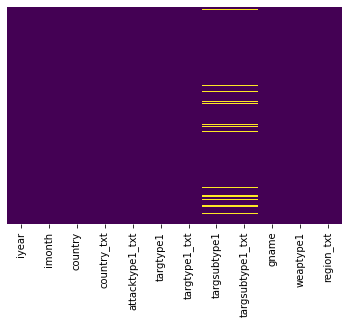

In [100]:
sns.heatmap(df[categories].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [101]:
df_cat

,Year,Month,Country_Id,Country,Attack_type,Target_ID,Target,Target_subtype_ID,Target_subtype,Attack_group,Weapon_name,Continent
0,1970,7,58,Dominican Republic,Assassination,14,Private Citizens & Property,68.0,Named Civilian,MANO-D,13,Central America & Caribbean
1,1970,0,130,Mexico,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,13,North America
2,1970,1,160,Philippines,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Unknown,13,Southeast Asia
3,1970,1,78,Greece,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,6,Western Europe
4,1970,1,101,Japan,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,8,East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,182,Somalia,Armed Assault,4,Military,36.0,Military Checkpoint,Al-Shabaab,5,Sub-Saharan Africa
181687,2017,12,200,Syria,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,6,Middle East & North Africa
181688,2017,12,160,Philippines,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),8,Southeast Asia
181689,2017,12,92,India,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Unknown,6,South Asia


In [102]:
df_cat.dtypes

Year                   int64
Month                  int64
Country_Id             int64
Country               object
Attack_type           object
Target_ID              int64
Target                object
Target_subtype_ID    float64
Target_subtype        object
Attack_group          object
Weapon_name            int64
Continent             object
dtype: object

## Exploratory Data Analysis

### 1. Top 10 countries with max crime


In [103]:
#Counting Toatl attacks in each country

country_count = df_cat.Country.value_counts().reset_index().rename(columns={'index': 'Country'})
country_count.columns.values[1] = 'Total Attacks'
country_count


,Country,Total Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
...,...,...
200,International,1
201,Wallis and Futuna,1
202,South Vietnam,1
203,Andorra,1


In [104]:
#Total number of countries
df_countries = df_cat['Country'].unique()
count_row = df_countries.shape[0]
count_row


205

### Visualisation

<AxesSubplot:xlabel='Country', ylabel='Total Attacks'>

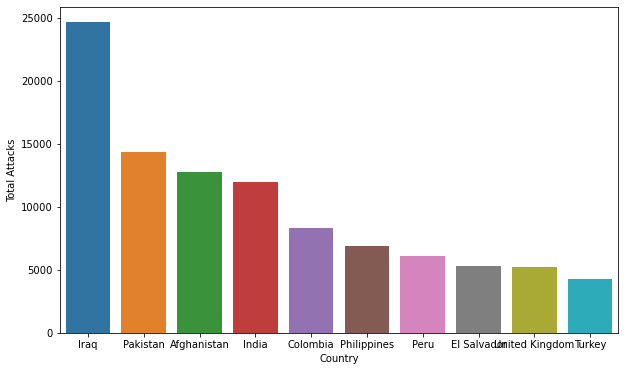

In [105]:
import matplotlib
x_data = country_count['Country'].head(10) # Plotting the top 10 countries with highest crime
y_data = country_count['Total Attacks'].head(10)
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.barplot(x_data,y_data)

**Observation:** It can be observed that Iraq has the maximum crime rate

## 2. Which are the top 10 most common crimes globally


In [106]:
df_cat.head()

,Year,Month,Country_Id,Country,Attack_type,Target_ID,Target,Target_subtype_ID,Target_subtype,Attack_group,Weapon_name,Continent
0,1970,7,58,Dominican Republic,Assassination,14,Private Citizens & Property,68.0,Named Civilian,MANO-D,13,Central America & Caribbean
1,1970,0,130,Mexico,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,13,North America
2,1970,1,160,Philippines,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Unknown,13,Southeast Asia
3,1970,1,78,Greece,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,6,Western Europe
4,1970,1,101,Japan,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,8,East Asia


In [107]:
attacks = df_cat.Country.value_counts().reset_index().rename(columns={'index': 'Attack_type'})
attacks.columns.values[1] = 'Total Attacks'
attacks


,Attack_type,Total Attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
...,...,...
200,International,1
201,Wallis and Futuna,1
202,South Vietnam,1
203,Andorra,1


<AxesSubplot:xlabel='Attack_type', ylabel='Total Attacks'>

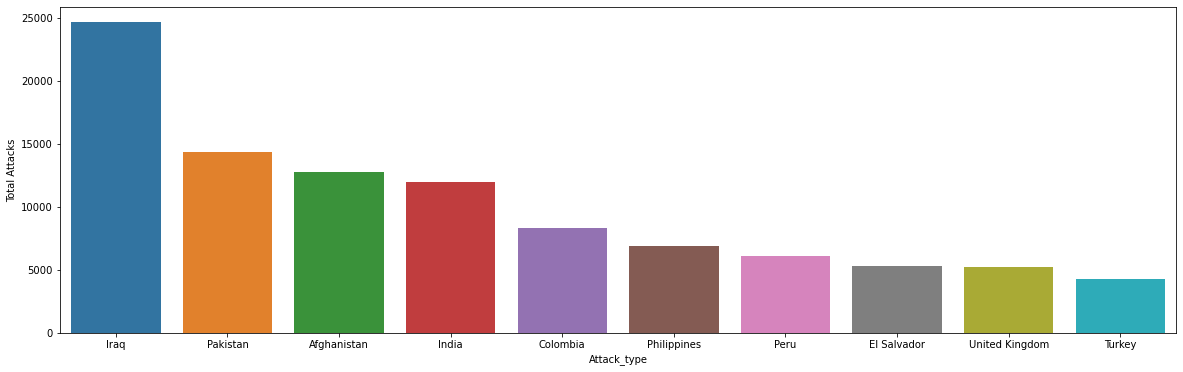

In [108]:
import matplotlib
x_data = attacks['Attack_type'].head(10) # Plotting the top 10 countries with highest crime
y_data = attacks['Total Attacks'].head(10)
matplotlib.rcParams['figure.figsize'] = (20, 6)
sns.barplot(x_data,y_data)

**Observation:** It can be observed that Bombing/Explosion is the most common crime globally

### 3. What is the most common crime in the given top 10 countries

In [109]:
country_names = country_count['Country'].head(10).values.tolist() # making list of top 10 countries with crime
df_country = df_cat.loc[df_cat['Country'].isin(country_names)] #making a table with the filtered countries


crime_data = pd.crosstab(df_country.Country,df_country.Attack_type)
crime_data

Attack_type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Country,,,,,,,,,
Afghanistan,2877,954,6245,355,16,27,1011,73,1173
Colombia,1972,1343,3128,275,33,89,1058,14,394
El Salvador,2216,449,2055,194,0,117,154,1,134
India,3184,1229,4825,996,43,44,1184,143,312
Iraq,3155,1287,18286,154,13,24,946,6,765
Pakistan,3859,1406,7613,300,19,35,823,77,236
Peru,1328,1002,3115,223,8,74,97,4,245
Philippines,2158,1099,2213,452,34,53,602,4,293
Turkey,1289,437,1957,279,13,13,158,10,136


<AxesSubplot:xlabel='Country'>

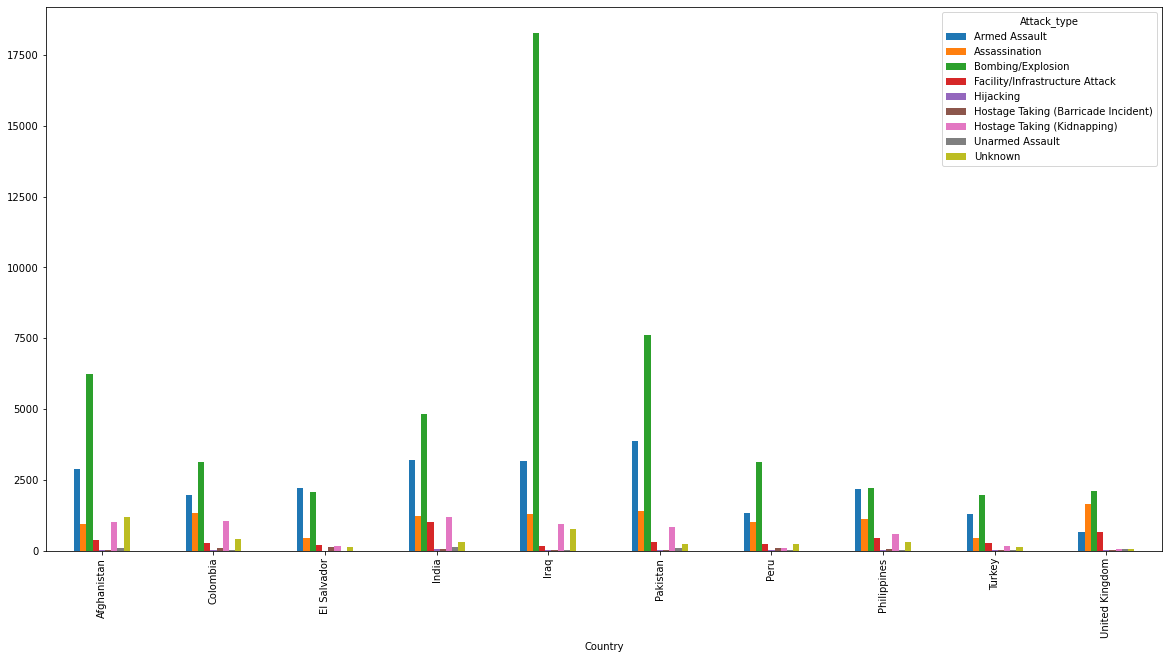

In [110]:
# plotting line graph
crime_data.plot(kind='bar',figsize=(20,10))

### 4. Yearwise trend in crime across countries

In [111]:
#attacks yearwise
df_cat['count'] =1       #initially, set that counter to 1.
yearwise_count = df_cat.groupby(['Year','Attack_type'])['count'].sum() 


In [112]:
print(yearwise_count)

Year  Attack_type                        
1970  Armed Assault                           61
      Assassination                           22
      Bombing/Explosion                      333
      Facility/Infrastructure Attack         174
      Hijacking                               11
                                            ... 
2017  Hijacking                               58
      Hostage Taking (Barricade Incident)     82
      Hostage Taking (Kidnapping)            878
      Unarmed Assault                        101
      Unknown                                825
Name: count, Length: 416, dtype: int64


In [113]:
year_data = pd.crosstab(df_cat.Year,df_cat.Continent)
year_data

Continent,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


### Visualization

<AxesSubplot:xlabel='Year'>

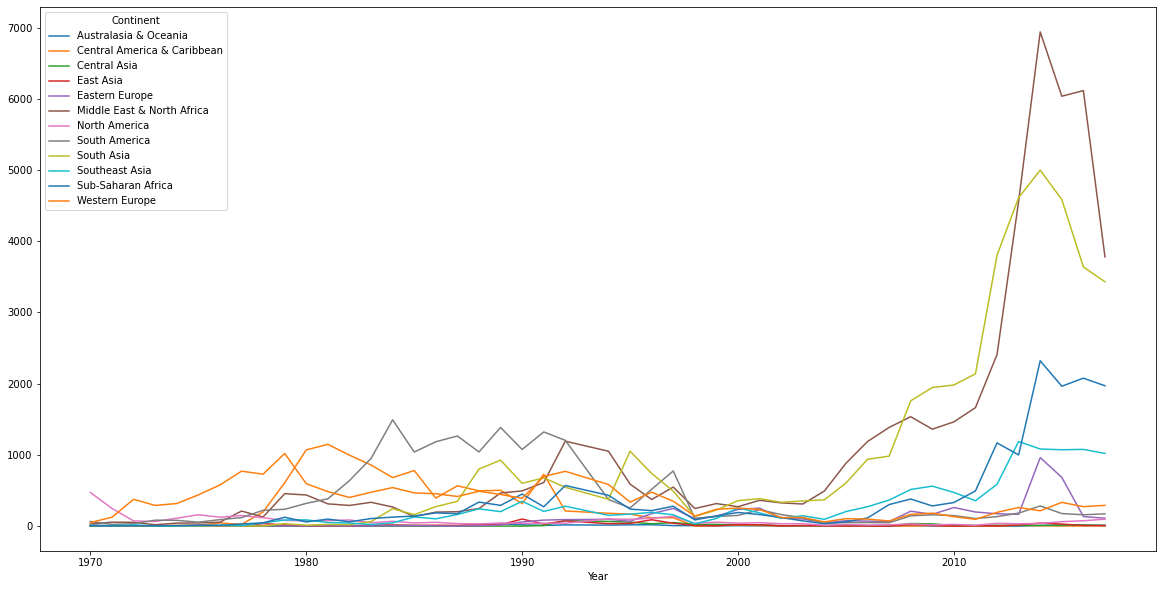

In [114]:
# plotting line graph
year_data.plot(kind='line',figsize=(20,10))


**Observation:** It can be observed that Middle East and North Africa have the maximum crime rate 2010 onwards

### 5. Top 5 groups performing these activities

In [115]:
# Dropping Unknown values from attacks group column
values = ['Unknown']

#drop any rows that have 7 or 11 in the rebounds column
df_cat = df_cat[df_cat.Attack_group.isin(values) == False]

In [116]:
df_cat

,Year,Month,Country_Id,Country,Attack_type,Target_ID,Target,Target_subtype_ID,Target_subtype,Attack_group,Weapon_name,Continent,count
0,1970,7,58,Dominican Republic,Assassination,14,Private Citizens & Property,68.0,Named Civilian,MANO-D,13,Central America & Caribbean,1
1,1970,0,130,Mexico,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,13,North America,1
5,1970,1,217,United States,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Black Nationalists,5,North America,1
6,1970,1,218,Uruguay,Assassination,3,Police,25.0,Police Security Forces/Officers,Tupamaros (Uruguay),5,South America,1
8,1970,1,217,United States,Facility/Infrastructure Attack,4,Military,28.0,Military Recruiting Station/Academy,New Year's Gang,8,North America,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181683,2017,12,4,Afghanistan,Armed Assault,17,Terrorists/Non-State Militia,94.0,Non-State Militia,Taliban,5,South Asia,1
181684,2017,12,92,India,Hostage Taking (Kidnapping),2,Government (General),15.0,Politician or Political Party Movement/Meeting...,Zeliangrong United Front,5,South Asia,1
181686,2017,12,182,Somalia,Armed Assault,4,Military,36.0,Military Checkpoint,Al-Shabaab,5,Sub-Saharan Africa,1
181687,2017,12,200,Syria,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,6,Middle East & North Africa,1


In [117]:
attacking_grp_count = df_cat.Attack_group.value_counts().reset_index().rename(columns={'index': 'Groups'})
attacking_grp_count.columns.values[1] = 'Total_Attacks'
attacking_grp_count

,Groups,Total_Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
...,...,...
3531,Ansar Sarallah,1
3532,Sword of Islam,1
3533,Support of Ocalan-The Hawks of Thrace,1
3534,Arab Revolutionary Front,1


In [118]:
names=attacking_grp_count.Groups.value_counts().index
val=attacking_grp_count.Total_Attacks.value_counts().values


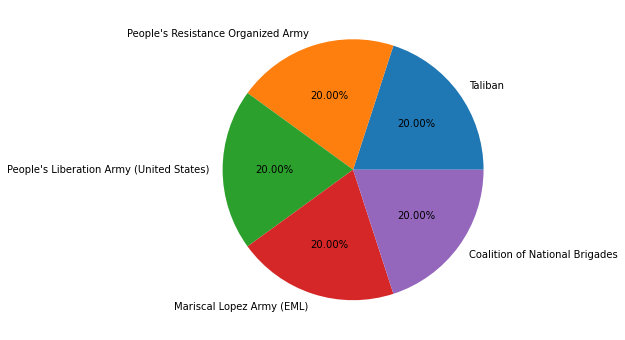

In [124]:
## Pie Chart- Top 5 countries that uses zomato
plt.pie(val[:5],labels=names[:5],autopct='%1.2f%%')
plt.show()

### 6. Top 5 attacked targets

In [120]:
Target_type_count = df_cat.Target_subtype.value_counts().reset_index().rename(columns={'index': 'Targets'})
Target_type_count.columns.values[1] = 'Total_Attacks'
Target_type_count



,Targets,Total_Attacks
0,Police Security Forces/Officers,6228
1,Military Unit/Patrol/Convoy,5884
2,"Military Personnel (soldiers, troops, officers...",5234
3,Village/City/Town/Suburb,5220
4,Unnamed Civilian/Unspecified,5187
...,...,...
107,Royalty,14
108,Demilitarized Zone (including Green Zone),13
109,Oil Tanker,13
110,Fire Fighter/Truck,12


In [121]:
targets=Target_type_count.Targets.value_counts().index
val=Target_type_count.Total_Attacks.value_counts().values


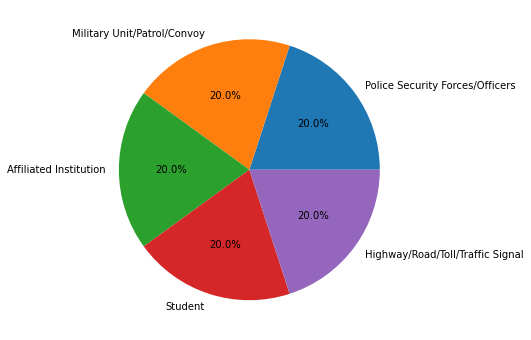

In [123]:
## Pie Chart- Top 5 countries that uses zomato
plt.pie(val[:5],labels=targets[:5],autopct='%1.1f%%')
plt.show()